In [24]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df = df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

In [27]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [28]:
df["Age"] = df["Age"].fillna(df["Age"].mean()).astype(int)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,S
887,1,1,0,19,0,0,30.0000,S
888,0,3,0,29,1,2,23.4500,S
889,1,1,1,26,0,0,30.0000,C


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [30]:
final_df = pd.concat([df, pd.get_dummies(df["Embarked"]).astype(int)], axis=1).drop("Embarked", axis=1)

In [31]:
final_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22,1,0,7.2500,0,0,1
1,1,1,0,38,1,0,71.2833,1,0,0
2,1,3,0,26,0,0,7.9250,0,0,1
3,1,1,0,35,1,0,53.1000,0,0,1
4,0,3,1,35,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.0000,0,0,1
887,1,1,0,19,0,0,30.0000,0,0,1
888,0,3,0,29,1,2,23.4500,0,0,1
889,1,1,1,26,0,0,30.0000,1,0,0


In [32]:
final_df.Pclass.unique() # PCLASS

array([3, 1, 2])

In [33]:
final_df.Sex.unique() # SEX male 1

array([1, 0])

<Axes: ylabel='Frequency'>

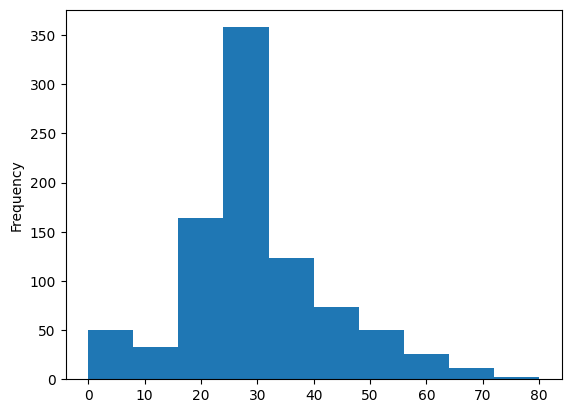

In [34]:
final_df["Age"].plot(kind="hist") # rangos entre 0 y 100

In [35]:
final_df = final_df.drop("SibSp", axis=1)

In [36]:
final_df = final_df.drop("Parch", axis=1)

In [37]:
final_df.Fare.unique() # numerico float entre 0 y 300

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [38]:
a_predecir = [[1, 0, 20, 12.7, 0,0,1]]

In [39]:
final_df

,Survived,Pclass,Sex,Age,Fare,C,Q,S
0,0,3,1,22,7.2500,0,0,1
1,1,1,0,38,71.2833,1,0,0
2,1,3,0,26,7.9250,0,0,1
3,1,1,0,35,53.1000,0,0,1
4,0,3,1,35,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27,13.0000,0,0,1
887,1,1,0,19,30.0000,0,0,1
888,0,3,0,29,23.4500,0,0,1
889,1,1,1,26,30.0000,1,0,0


In [52]:
final_df["Age"].value_counts().idmax

AttributeError: 'Series' object has no attribute 'idmax'

In [17]:
X = final_df.drop("Survived", axis=1)
y = final_df.Survived

In [18]:
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [19]:
cvs = cross_val_score(rf, X, y)

In [20]:
rf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
import pickle
with open("mimodelo.pkl", "wb") as file:
    pickle.dump(rf, file)

In [22]:
import pickle
with open("mimodelo.pkl", "rb") as file:
    mi_modelo = pickle.load(file)

In [23]:

mi_modelo.predict(a_predecir)

c:\Users\Usuario\miniconda3\envs\streamlink_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])